In [1]:
.libPaths('/disk1/wenqing/anacondAF/envs/wq_R4.2/lib/R/library')

In [2]:
library(tidyr)
library(dplyr)
library(ggplot2)
library(tidyverse)
library(pheatmap)
library(cluster) 
library(dendextend)
library(ape)
library(factoextra)
library(gridBase)
library(gridExtra)
library(pheatmap)
library(grid)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ lubridate 1.9.3     ✔ stringr   1.5.0
✔ purrr     1.0.2     ✔ tibble    3.2.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

---------------------
Welcome to dendextend version 1.17.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendexten

In [1]:
data <- read.table("/disk1/wenqing/tmp_data/PFC_s2/salmon_output_untrimmed_ver/project_events_untrimmed_ver.psi",row.names=NULL)
rownames(data) <- data[,1]
data <- data[,-1]
head(data)


,GW08,GW12,GW16_1_3,GW16_1_4,GW16_1_9,GW19_1_1,GW19_1_2,GW19_1_3,GW23_1_1,GW23_1_2,GW23_1_3,GW26_1_1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003.15;A5:chrX:100635746-100636191:100635746-100636608:-,0,0,NaN,0,0.0000000,0,0,0,0,0.0000000,0,0
ENSG00000000003.15;A5:chrX:100635746-100636608:100635746-100636793:-,1,1,0,1,1.0000000,1,1,1,1,1.0000000,1,1
ENSG00000000003.15;AF:chrX:100635746-100636191:100636689:100635746-100636793:100637104:-,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000000003.15;SE:chrX:100630866-100632485:100632568-100633405:-,1,1,0,1,1.0000000,1,1,1,1,1.0000000,1,1
ENSG00000000419.13;A3:chr20:50940955-50941105:50940933-50941105:-,1,1,1,1,NaN,1,1,NaN,1,0.9876185,1,1
ENSG00000000419.13;A3:chr20:50940955-50942031:50940933-50942031:-,0,NaN,0,0,0.5916562,0,0,0,0,NaN,NaN,0


In [89]:
# 定义函数
extract_rows_with_pattern <- function(data, pattern) {
  # 使用grep函数找出匹配模式的行名索引
  matching_rows <- grep(pattern, rownames(data), value = TRUE)
  
  # 根据匹配的行名索引提取数据框的子集
  subset_data <- data[matching_rows, ]
  
  # 返回提取的子数据框
  return(subset_data)
}


In [90]:
# 调用函数
A3_psi <- extract_rows_with_pattern(data, "A3")
A5_psi <- extract_rows_with_pattern(data, "A5")
AF_psi <- extract_rows_with_pattern(data, "AF")
AL_psi <- extract_rows_with_pattern(data, "AL")
MX_psi <- extract_rows_with_pattern(data, "MX")
RI_psi <- extract_rows_with_pattern(data, "RI")
SE_psi <- extract_rows_with_pattern(data, "SE")


In [91]:
head(SE_psi)

,GW08,GW12,GW16_1_3,GW16_1_4,GW16_1_9,GW19_1_1,GW19_1_2,GW19_1_3,GW23_1_1,GW23_1_2,GW23_1_3,GW26_1_1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003.15;SE:chrX:100630866-100632485:100632568-100633405:-,1.0000000,1,0.0000000,1.0000000,1,1.0000000,1.0000000,1,1.0000000,1,1,1.0000000
ENSG00000000419.13;SE:chr20:50940933-50941105:50941209-50942031:-,0.0000000,NaN,0.0000000,0.0000000,0,0.0000000,0.0000000,0,0.0000000,1,NaN,0.0000000
ENSG00000000419.13;SE:chr20:50940933-50941129:50941209-50942031:-,0.4081377,1,0.9809102,0.8805796,0,0.7323949,0.9584078,0,0.7285232,1,1,0.9868153
ENSG00000000419.13;SE:chr20:50940955-50941105:50941209-50942031:-,1.0000000,1,1.0000000,1.0000000,0,1.0000000,1.0000000,NaN,1.0000000,1,1,1.0000000
ENSG00000000419.13;SE:chr20:50941209-50942031:50942126-50945737:-,1.0000000,1,1.0000000,1.0000000,NaN,1.0000000,1.0000000,NaN,1.0000000,1,1,1.0000000
ENSG00000000457.14;SE:chr1:169854964-169855796:169855957-169859041:-,NaN,NaN,0.0000000,0.0000000,0,0.0000000,NaN,NaN,0.0000000,0,NaN,0.0000000


In [92]:
write.table(A3_psi,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/psi_matrix/A3_psi.txt",quote=F,sep='\t')
write.table(A5_psi,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/psi_matrix/A5_psi.txt",quote=F,sep='\t')
write.table(AF_psi,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/psi_matrix/AF_psi.txt",quote=F,sep='\t')
write.table(AL_psi,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/psi_matrix/AL_psi.txt",quote=F,sep='\t')
write.table(MX_psi,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/psi_matrix/MX_psi.txt",quote=F,sep='\t')
write.table(RI_psi,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/psi_matrix/RI_psi.txt",quote=F,sep='\t')
write.table(SE_psi,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/psi_matrix/SE_psi.txt",quote=F,sep='\t')

[1] 6995   12


FALSE  TRUE 
 5474  1521 

[1] 6995

[1] 1521   12

[1] 6995   14

,stages
,<chr>
GW08,week8
GW12,week12
GW16_1_3,week16
GW16_1_4,week16
GW16_1_9,week16
GW19_1_1,week19
GW19_1_2,week19
GW19_1_3,week19
GW23_1_1,week23


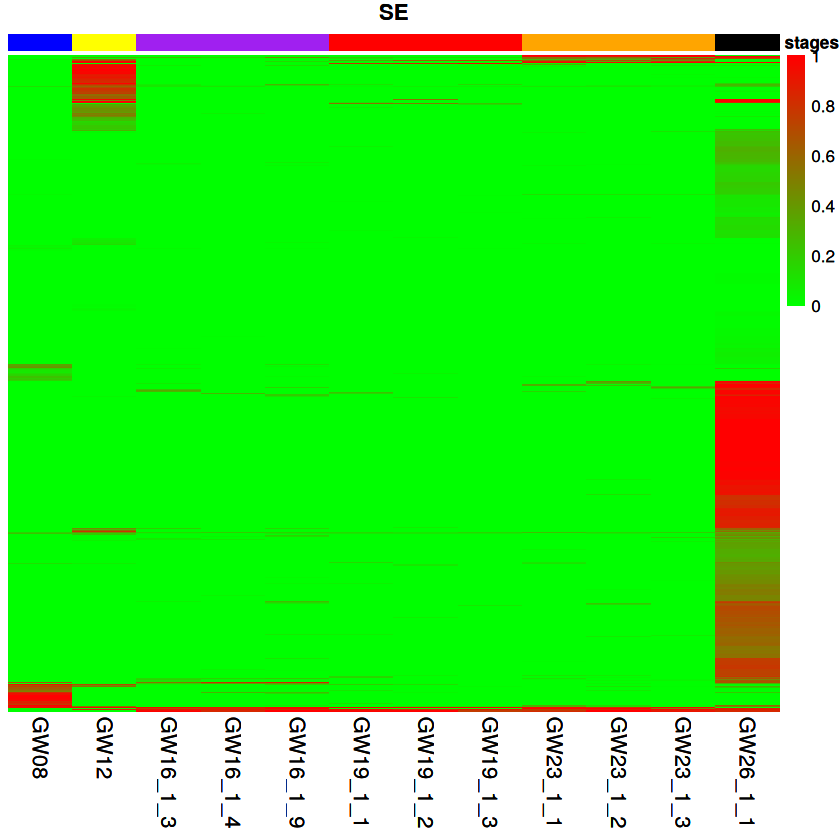

In [86]:
####将psi值为1的点转换为0
SE_psi[SE_psi==1] <- 0
#######分开处理每一个数据框（剪切事件
#step1:提取每个样本转录本的数据，按是否去掉1的psi分别分析
SE_psi[is.na(SE_psi)] <- 0

sub_SE_psi <- SE_psi[rowSums(SE_psi)!=0,]
dim(sub_SE_psi)
p_values <- c()
for(as_event in rownames(sub_SE_psi)){
    sub_sample_data <- as.data.frame(cbind(c('GW08','GW12',rep('GW16',3),rep('GW19',3),rep('GW23',3),'GW26'),colnames(data), as.numeric(sub_SE_psi[as_event,])))
    colnames(sub_sample_data) <- c("group","sample",'psi')
    sub_sample_data$group <- factor(sub_sample_data$group)
    #head(sub_sample_data)
    result <- aov(psi~group,sub_sample_data)
    p_value <- summary(result)[[1]][["Pr(>F)"]][1]
    p_values <- c(p_values,p_value) 
}

fdr_adjusted_p_values <- p.adjust(p_values, method = "BH")
table(fdr_adjusted_p_values < 0.05)
length(fdr_adjusted_p_values)
#对差异编辑的位点进行热图展示
de_data <- sub_SE_psi[rownames(sub_SE_psi)[fdr_adjusted_p_values < 0.05],]
dim(de_data)
all_psi_with_p_values <- sub_SE_psi
all_psi_with_p_values$p_value <- p_values
all_psi_with_p_values$adjust_p <- fdr_adjusted_p_values
dim(all_psi_with_p_values)
write.table(all_psi_with_p_values,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/de_psi/notwith1/SE/all_psi_with_p_values.txt",quote=F,sep='\t')
my_palette <- colorRampPalette(c("green", "red"))(n = 100)  # 创建自定义颜色梯度，100级颜色 
annotation_col = data.frame(
  stages = c('week8','week12',rep('week16',3),rep('week19',3),rep('week23',3),'week26')
  #color = c('blue','yellow',rep('purple',3),rep('red',3),rep('orange',3),'black')
)
rownames(annotation_col) = colnames(de_data)
annotation_col
color_mapping <- list(stages=c(week8 = "blue", week12 = "yellow", week16 = "purple", week19 = 'red', week23 = 'orange', week26 = 'black')) 
#pdf("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/de_editing/de_edited_sites.pdf")
heatmap_SE <- pheatmap(de_data,
         cluster_cols = FALSE,
         cluster_rows = TRUE,
         show_colnames = TRUE,
         show_rownames = FALSE,
         #cellheight = 0.5,
         color = my_palette,
         #fontsize_row = 6,          # 行标签字体大小
         fontsize_col = 13,          # 列标签字体大小
         border_color = NA,    # 边框颜色
         cell_border_color = "grey",
         #alpha = 0.8,             # 颜色透明度
         treeheight_row = 0,
         annotation_col = annotation_col,
         annotation_colors =  color_mapping,
         annotation_legend = FALSE, 
         annotation_names_col = TRUE,# 添加列注释
         main = "SE",
         #main = "Customized Heatmap", # 图表标题
         #legend_breaks = seq(min(de_data), max(de_data), length.out = 5), # 图例刻度
         legend_labels = 'psi' # 图例标签
)
heatmap_SE
#dev.off()
#mtext("My X-axis Label", side = 1, line = 2.5, cex = 1.2) 
vector_data <- as.vector(t(de_data))
length(vector_data)
df_expanded <- data.frame(
  Row = rep(rownames(de_data), times = ncol(de_data)),
  Col = rep(colnames(de_data), each = nrow(de_data)),
  Value = vector_data
)


# 查看转换后的数据框
#head(df_expanded)
dist_obj <- dist(df_expanded$Value,method = "euclidean")
hclust_obj <- hclust(dist_obj,method='ward.D2')

#fviz_nbclust(as.matrix(df_expanded$Value), FUN = hcut,hclust_method = "ward.D2", method = "wss") +
#  ggtitle("Elbow Method to Determine Optimal Number of Clusters")
# 根据以上方法选择一个合适的聚类数目k
# 然后切割树状图得到k个簇
k <- 3 # 假设通过上述方法确定的最佳聚类数为5
clusters <- cutree(hclust_obj, k = k)

# 输出每个编辑位点所属的簇
# print(clusters)
gene_psi_wz_cluster <- df_expanded
gene_psi_wz_cluster$cluster <- clusters
write.table(gene_psi_wz_cluster,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/de_psi/notwith1/AF/de_psi_genes_wz_3clusters.txt",quote=F,sep='\t',row.names=F)
write.table(table(gene_psi_wz_cluster$Col,gene_psi_wz_cluster$cluster),"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/de_psi/notwith1/AF/de_psi_gene_num_in_3clusters.txt",sep='\t',quote=F)

data_summary <- gene_psi_wz_cluster %>%
  group_by(Col, cluster) %>%
  summarize(avg_expr = mean(Value),
            sd_expr = sd(Value)) # 添加标准差计算
data_summary$cluster <- as.factor(data_summary$cluster)
data_summary
# 假设df是原始的data_summary数据框


# 步骤1: 获取所有独特的Col和cluster组合
all_combinations <- expand.grid(unique(data_summary$Col), unique(data_summary$cluster))
colnames(all_combinations) <- c("Col", "cluster")

# 步骤2: 创建一个包含所有组合且初始化编辑水平为0的数据框
complete_data <- all_combinations %>%
  mutate(avg_expr = 0,
         sd_expr = 0)

# 步骤3: 将原始数据与新创建的数据框合并，确保所有组合都有记录
# 使用left_join确保所有来自complete_data的行都被保留
final_data <- complete_data %>%
  left_join(data_summary, by = c("Col", "cluster"), suffix = c("_init", "")) %>%
  select(-ends_with("_init")) # 移除初始化时添加的后缀列

#head(final_data)



# 如果有特定的值需要填充而非0，可以在第2步时相应修改
final_data[is.na(final_data)] <- 0
# 假设final_data已经是包含了所有组合（即使某些原始数据中未出现的组合值为0）的数据框

# 确保final_data中包含了误差范围的最小值和最大值列，如果还没有的话需要先计算并添加
# 这里简化处理，直接使用之前逻辑但确保使用final_data作为数据源
final_data <- final_data %>%
  group_by(Col, cluster) %>%
  mutate(min_val = avg_expr - sd_expr,
         max_val = avg_expr + sd_expr)
final_data <- as.data.frame(final_data)
#head(final_data)
final_data$Col <- rep(c('GW08','GW12','GW16_1_3','GW16_1_4','GW16_1_9','GW19_1_1','GW19_1_2','GW19_1_3','GW23_1_1','GW23_1_2','GW23_1_3','GW26_1_1'),times=3)
#head(final_data)


p_AF <- ggplot(data=final_data,aes(x=Col,y=avg_expr,group=cluster))+
  geom_line(aes(color=cluster,lty=cluster))+
  geom_point(aes(color=cluster,shape=cluster))+
  geom_ribbon(aes(x=Col,ymin=min_val,ymax=max_val,fill=cluster,
                  color=cluster),alpha=0.5)+
  scale_color_manual(values = c("1"="#840dd3","2"="#04c49c","3"="#2759bd"))+
  scale_fill_manual(values = c("1"="#840dd3","2"="#04c49c","3"="#2759bd"))+
  #colors=c("#840dd3","#04c49c","#2759bd")
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5),
        legend.title = element_blank(),
        axis.text.x = element_text(angle = 45, hjust = 1),
        text = element_text(size = 13)) +
  xlab('')+
  ylab('PSI of Genes')


In [ ]:
# 创建一个新的图形设备以便捕获
grid.newpage()
pushViewport(viewport())
# 绘制第一个热图并捕获
print(heatmap_A3)
grob_A3 <- grid.grab()

# 清除当前图形并绘制第二个热图
grid.newpage()
pushViewport(viewport())
print(heatmap_A5)
grob_A5 <- grid.grab()

grid.newpage()
pushViewport(viewport())
print(heatmap_AF)
grob_AF <- grid.grab()

grid.newpage()
pushViewport(viewport())
print(heatmap_AL)
grob_AL <- grid.grab()

grid.newpage()
pushViewport(viewport())
print(heatmap_MX)
grob_MX <- grid.grab()

grid.newpage()
pushViewport(viewport())
print(heatmap_RI)
grob_RI <- grid.grab()

grid.newpage()
pushViewport(viewport())
print(heatmap_SE)
grob_SE <- grid.grab()

# 组合热图
combined_heatmap <- grid.arrange(grob_A3, grob_A5, grob_AF, grob_AL, grob_MX, grob_RI, grob_SE, ncol = 4)
ggsave("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/de_psi/notwith1/7_AS_event_de_psi.png", combined_heatmap, dpi = 300, width = 15, height = 10)
# 或者使用gridExtra的保存方法，如果适用

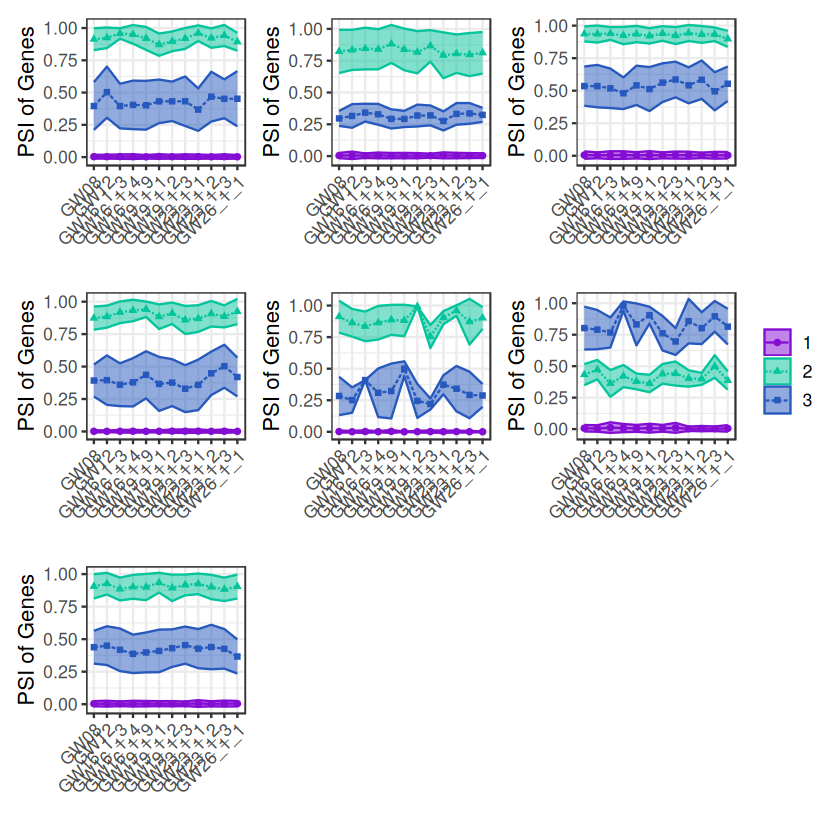

In [55]:
grid_layout <- p_A3 + p_A5 + p_AF + p_AL + p_MX + p_RI + p_SE + NULL

# 调整间距（可选）
grid_layout + plot_layout(guides = "collect")


# 保存到文件
ggsave("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/de_psi/notwith1/7_AS_event_de_psi_in_3custers.png", grid_layout, width = 15, height = 10, dpi = 300)